loading annotations into memory...
Done (t=0.19s)
creating index...
index created!


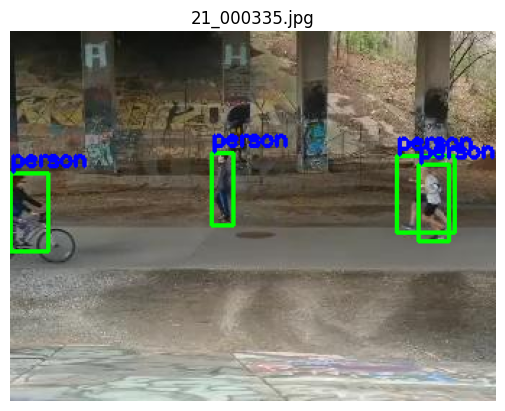

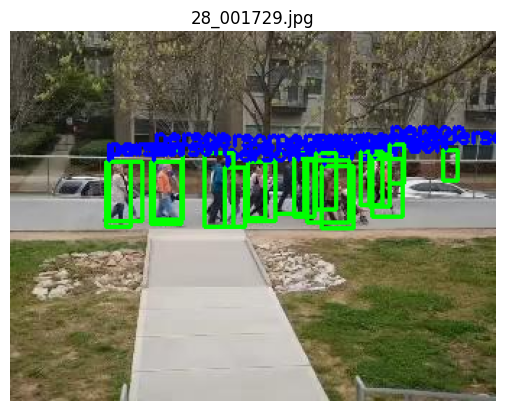

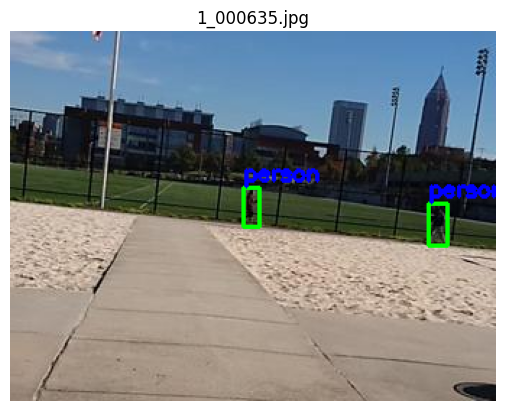

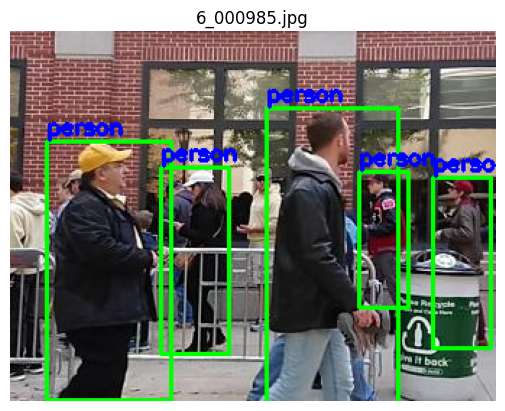

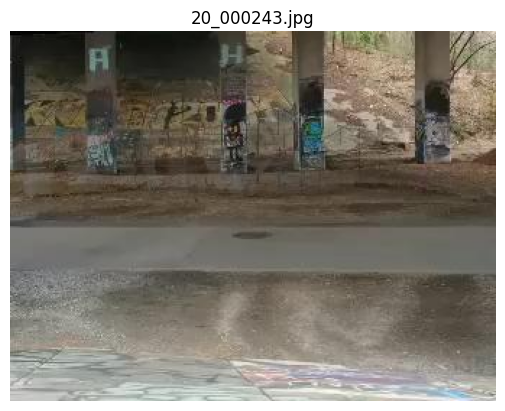

In [18]:
import json
import os
import random
import cv2
import matplotlib.pyplot as plt
from pycocotools.coco import COCO

# ==== CONFIGURATION ====
ANNOTATION_PATH = "../datasets/Camel_Vis_formatted/annotations/instances_train2017.json"
IMAGE_DIR = "../datasets/Camel_Vis_formatted/train2017"
NUM_IMAGES = 5
# ========================

def draw_boxes(img, annotations, coco):
    for ann in annotations:
        bbox = ann['bbox']
        cat_id = ann['category_id']
        category = coco.loadCats(cat_id)[0]['name']
        
        x, y, w, h = map(int, bbox)
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(img, category, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 
                    0.5, (255, 0, 0), 2)
    return img

def main():
    coco = COCO(ANNOTATION_PATH)
    img_ids = coco.getImgIds()
    selected_ids = random.sample(img_ids, min(NUM_IMAGES, len(img_ids)))

    for img_id in selected_ids:
        img_info = coco.loadImgs(img_id)[0]
        file_path = os.path.join(IMAGE_DIR, img_info['file_name'])

        img = cv2.imread(file_path)
        if img is None:
            print(f"Image not found: {file_path}")
            continue

        ann_ids = coco.getAnnIds(imgIds=img_id)
        anns = coco.loadAnns(ann_ids)

        img_with_boxes = draw_boxes(img, anns, coco)

        # Convert BGR to RGB for matplotlib
        img_rgb = cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        plt.title(img_info['file_name'])
        plt.axis('off')
        plt.show()

if __name__ == "__main__":
    main()


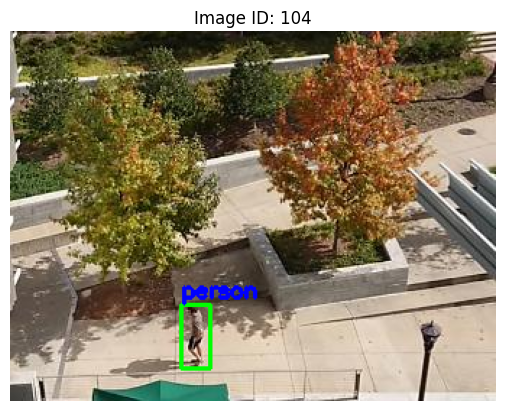

In [17]:
import os
import cv2
import matplotlib.pyplot as plt
import random

# ==== CONFIG ====
ANNOTATIONS_PATH = "../datasets/Camel/seq_2_human/Seq2-Vis.txt"
IMAGE_FOLDER = "../datasets/Camel/seq_2_human/Visual"
NUM_IMAGES_TO_SHOW = 1
EXT = ".jpg"  # or .png etc.
# ================

# Load annotations into a dict {image_id: [list of boxes]}
annotations = {}
with open(ANNOTATIONS_PATH, "r") as f:
    for line in f:
        parts = line.strip().split()
        if len(parts) != 7:
            continue  # Skip malformed lines

        image_id = int(parts[0])
        category_id = int(parts[2])  # Optional if you're checking class_ids
        bbox = list(map(float, parts[3:]))  # x, y, w, h

        if image_id not in annotations:
            annotations[image_id] = []
        annotations[image_id].append({
            "bbox": bbox,
            "category": category_id
        })

# Pick a few random images to visualize
# random_ids = random.sample(list(annotations.keys()), min(NUM_IMAGES_TO_SHOW, len(annotations)))
random_ids = [104]

for image_id in random_ids:
    image_path = os.path.join(IMAGE_FOLDER, f"{str(image_id).zfill(6)}{EXT}")
    img = cv2.imread(image_path)

    if img is None:
        print(f"Could not read {image_path}")
        continue

    for ann in annotations[image_id]:
        x, y, w, h = map(int, ann["bbox"])
        category_id = ann["category"]

        label = "person" if category_id == 1 else f"class_{category_id}"
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(img, label, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                    (255, 0, 0), 2)

    # Display using matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(f"Image ID: {image_id}")
    plt.axis("off")
    plt.show()


In [11]:
image_id = 37


In [14]:
str(image_id).zfill(6)  

'000037'